In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import h5py
data = h5py.File("/content/drive/My Drive/Colab Notebooks/Python/Lab/Lab 7/SVHN_single_grey.h5", "r+")

##Data fetching##

In [54]:
list(data.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_test = data['X_test']
X_train = data['X_train']
X_val = data['X_val']
y_test = data['y_test']
y_train = data['y_train']
y_val = data['y_val']

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


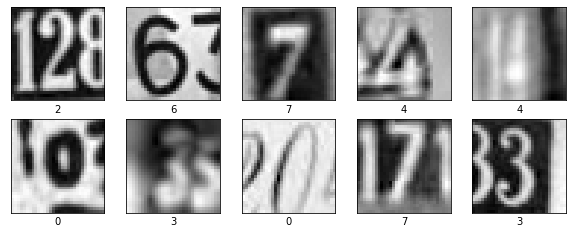

In [57]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

##Data Preprocessing##

In [58]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [0]:
#Convert labels to one hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [0]:
X_train_norm = X_train/np.float32(255)
X_test_norm = X_test/np.float32(255)
X_val_norm = X_val/np.float32(255)

##Building a Network##

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [0]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))
model.add(BatchNormalization())

##Adding the layers

In [0]:
# Hidden layer
model.add(Dense(200, activation='relu', name='Layer_1'))
model.add(BatchNormalization())

# Hidden layer
model.add(Dense(100, activation='relu', name='Layer_2'))
model.add(BatchNormalization())
# Dropout layer
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(60, activation='relu', name='Layer_3'))
model.add(BatchNormalization())

# Hidden layer
model.add(Dense(30, activation='relu', name='Layer_4'))
model.add(BatchNormalization())
# Dropout layer
model.add(Dropout(0.3))

# Output layer
model.add(Dense(10, activation='softmax', name='Output'))

##Compilation of model##

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model_results = model.fit(X_train_norm,y_train_cat, validation_data=(X_val_norm,y_val_cat), epochs=15, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/15
42000/42000 [==============================] - 13s 316us/sample - loss: 2.3165 - accuracy: 0.1852 - val_loss: 1.7551 - val_accuracy: 0.4186
Epoch 2/15
42000/42000 [==============================] - 12s 283us/sample - loss: 1.8454 - accuracy: 0.3432 - val_loss: 1.4169 - val_accuracy: 0.5553
Epoch 3/15
42000/42000 [==============================] - 12s 282us/sample - loss: 1.6593 - accuracy: 0.4267 - val_loss: 1.2335 - val_accuracy: 0.6248
Epoch 4/15
42000/42000 [==============================] - 12s 285us/sample - loss: 1.5454 - accuracy: 0.4758 - val_loss: 1.1260 - val_accuracy: 0.6605
Epoch 5/15
42000/42000 [==============================] - 12s 284us/sample - loss: 1.4623 - accuracy: 0.5133 - val_loss: 1.0851 - val_accuracy: 0.6642
Epoch 6/15
42000/42000 [==============================] - 12s 281us/sample - loss: 1.3887 - accuracy: 0.5414 - val_loss: 0.9744 - val_accuracy: 0.7083
Epoch 7/15
42000/42000 [====================

##Printing accuracy and Confusion Matrix##

In [66]:
model_result = model.evaluate(X_test_norm, y_test_cat, batch_size=32)

18000/18000 [==============================] - 2s 92us/sample - loss: 0.7393 - accuracy: 0.7710


In [67]:
print("For model: loss = %2f and accuracy = %2f" %(model_result[0], model_result[1] * 100))

For model: loss = 0.739299 and accuracy = 77.100003


In [68]:
from sklearn.metrics import confusion_matrix
print("confusion matrix")
print(confusion_matrix(model.predict_classes(X_test_norm), y_test))

confusion matrix
[[1499   39   15   18   26   12   44   17   34   96]
 [  56 1533   59   69  112   37   50   96   64   64]
 [  17   32 1354   62   28   24   20  147   19   28]
 [  34   41   55 1203   26  122   21   29   52   56]
 [  27   75   34   24 1489   30   70   16   59   27]
 [  13   18   14  151   20 1326  105    7  120   54]
 [  27   12    6   12   32   76 1370   10   89   14]
 [  29   43  170   52    7   11   14 1447   11   33]
 [  29   23   33   95   32   94  125   10 1294   69]
 [  83   12   63   33   40   36   13   29   70 1363]]
